# Time Series Visualization and Projection

Leveraging 20 years of Temperature and Drought Condition data at a county (~3100) level to illustrate relevant climate information

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 

### Data Imports and Formatting

In [44]:
mon = pd.read_csv('../../data/clean-data/Monthly_Temp_Drought_Combo.csv', dtype = {'FIPS':str})

In [45]:
mon.drop(columns = 'Unnamed: 0', inplace = True)

In [46]:
mon.head()

,Month,FIPS,Tmin_C,Tmax_C,Tmean_C,Flag_T,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,2000-01,1001,4.38,13.26,8.61,0.0,0.0,100.0,75.00,0.00,0.0,0.0
1,2000-01,1003,8.68,15.99,12.20,0.0,0.0,100.0,0.00,0.00,0.0,0.0
2,2000-01,1005,5.00,13.82,9.18,0.0,0.0,100.0,87.14,15.22,0.0,0.0
3,2000-01,1007,3.99,12.64,7.98,0.0,0.0,100.0,80.29,0.00,0.0,0.0
4,2000-01,1009,2.18,10.12,5.92,0.0,0.0,100.0,100.00,8.79,0.0,0.0


In [47]:
mon.dtypes

Month                   object
FIPS                    object
Tmin_C                 float64
Tmax_C                 float64
Tmean_C                float64
Flag_T                 float64
normal_wet             float64
abnormally_dry         float64
moderate_drought       float64
severe_drought         float64
extreme_drought        float64
exceptional_drought    float64
dtype: object

In [48]:
mon.rename(columns = {
    'Month' : 'month',
    'FIPS' : 'fips',
    'Tmin_C' : 'min_temp',
    'Tmax_C' : 'max_temp',
    'Tmean_C' : 'mean_temp',
    'Flag_T' : 'flag_pop_covered'
}, inplace = True)

In [49]:
mon['month'] = pd.to_datetime(mon['month'],format = ('%Y-%m'))
mon['month'].head()

0   2000-01-01
1   2000-01-01
2   2000-01-01
3   2000-01-01
4   2000-01-01
Name: month, dtype: datetime64[ns]

In [50]:
mon['fips'] = mon['fips'].str.rjust(5,'0')
#cite :https://stackoverflow.com/a/339024 for rjust
mon['fips'].head()

0    01001
1    01003
2    01005
3    01007
4    01009
Name: fips, dtype: object

In [51]:
mon.head()

,month,fips,min_temp,max_temp,mean_temp,flag_pop_covered,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,2000-01-01,01001,4.38,13.26,8.61,0.0,0.0,100.0,75.00,0.00,0.0,0.0
1,2000-01-01,01003,8.68,15.99,12.20,0.0,0.0,100.0,0.00,0.00,0.0,0.0
2,2000-01-01,01005,5.00,13.82,9.18,0.0,0.0,100.0,87.14,15.22,0.0,0.0
3,2000-01-01,01007,3.99,12.64,7.98,0.0,0.0,100.0,80.29,0.00,0.0,0.0
4,2000-01-01,01009,2.18,10.12,5.92,0.0,0.0,100.0,100.00,8.79,0.0,0.0


In [52]:
# Convert Celsius to Farenheit to limit confusion within the U.S. Market
mon[['min_temp','max_temp','mean_temp']] *= (9/5)
mon[['min_temp','max_temp','mean_temp']] += 32

In [53]:
# Confirm conversion of tepmerature columns
mon.head()

,month,fips,min_temp,max_temp,mean_temp,flag_pop_covered,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,2000-01-01,01001,39.884,55.868,47.498,0.0,0.0,100.0,75.00,0.00,0.0,0.0
1,2000-01-01,01003,47.624,60.782,53.960,0.0,0.0,100.0,0.00,0.00,0.0,0.0
2,2000-01-01,01005,41.000,56.876,48.524,0.0,0.0,100.0,87.14,15.22,0.0,0.0
3,2000-01-01,01007,39.182,54.752,46.364,0.0,0.0,100.0,80.29,0.00,0.0,0.0
4,2000-01-01,01009,35.924,50.216,42.656,0.0,0.0,100.0,100.00,8.79,0.0,0.0


In [54]:
mon.dtypes

month                  datetime64[ns]
fips                           object
min_temp                      float64
max_temp                      float64
mean_temp                     float64
flag_pop_covered              float64
normal_wet                    float64
abnormally_dry                float64
moderate_drought              float64
severe_drought                float64
extreme_drought               float64
exceptional_drought           float64
dtype: object

#### Import Annual Summarized Data

In [103]:
year = pd.read_csv('../../data/clean-data/Temp_Drought_Combo.csv', dtype= {'FIPS' : str})
year.drop(columns = 'Unnamed: 0', inplace = True)
year['year'] = pd.to_datetime(year['year'].astype(str))
year['FIPS'] = year['FIPS'].str.rjust(5,'0')
# year.set_index('year', inplace = True)

In [106]:
year.head()

,year,FIPS,Tmean_C,TDmean_C,NETmean_C,HImean_C,HXmean_C,WBGTmean_C,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,2000-01-01,01001,18.45,11.49,12.37,18.48,21.36,16.73,0.0,0.0,0.0,0.0,0.0,0.0,0.14,99.86,73.70,56.07,38.79,28.61
1,2000-01-01,01003,20.07,14.69,13.78,20.70,24.86,18.90,0.0,0.0,0.0,0.0,0.0,0.0,0.00,100.00,80.69,65.77,47.65,20.86
2,2000-01-01,01005,18.63,12.14,12.92,18.72,21.87,17.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,100.00,95.99,73.52,43.53,18.99
3,2000-01-01,01007,18.01,11.13,12.26,18.04,20.81,16.42,0.0,0.0,0.0,0.0,0.0,0.0,7.28,92.72,70.78,48.97,35.25,28.87
4,2000-01-01,01009,16.65,10.19,10.74,16.57,19.02,15.25,0.0,0.0,0.0,0.0,0.0,0.0,6.38,93.62,81.44,54.57,30.77,13.16


#### Create County Dictionary to enable Human Readable Outputs

In [230]:
counties = pd.read_csv('../../data/raw-data/counties.csv', dtype = {'FIPS': str})
counties.drop(columns = 'Unnamed: 0', inplace = True)
counties['FIPS'] = counties['FIPS'].str.rjust(5,'0')

counties.head()

county_dict = dict(zip(counties['FIPS'], zip(counties['STATE'], counties['COUNTYNAME'], counties['LON'], counties['LAT'])))

## Local Time Series

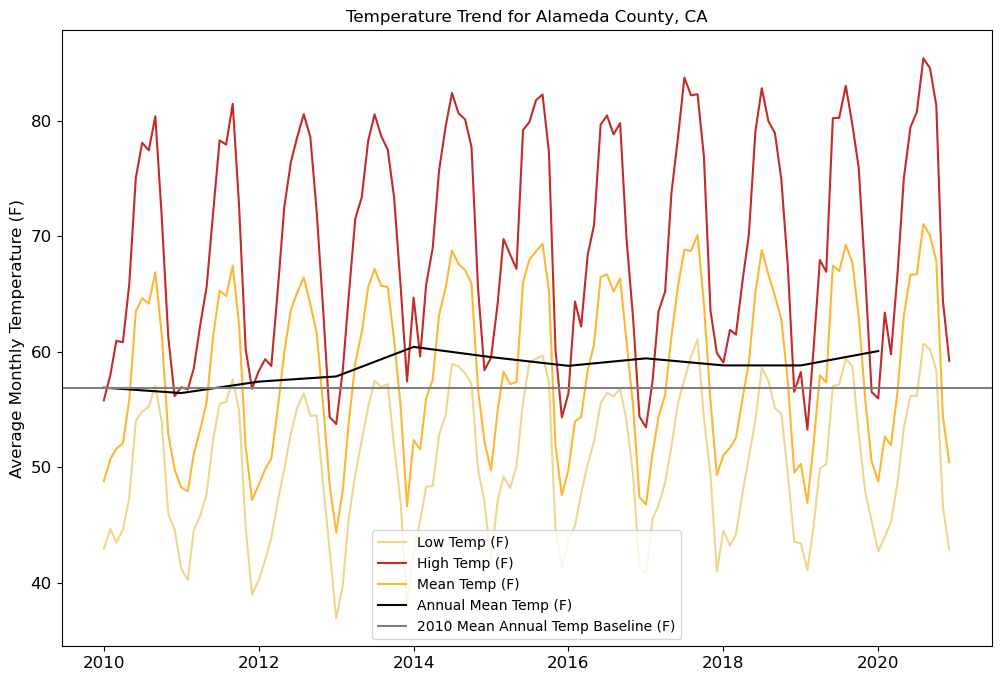

/var/folders/w7/4sqt0lt90t72lgqr2zq3p6l80000gn/T/ipykernel_85379/3800490390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_month_view_df['extreme_plus'] = county_month_view_df[['exceptional_drought','extreme_drought']].max(axis = 1)
/var/folders/w7/4sqt0lt90t72lgqr2zq3p6l80000gn/T/ipykernel_85379/3800490390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_month_view_df['severe_plus'] = county_month_view_df[['exceptional_drought','extreme_drought','severe_drought']].max(axis = 1)
/var/f

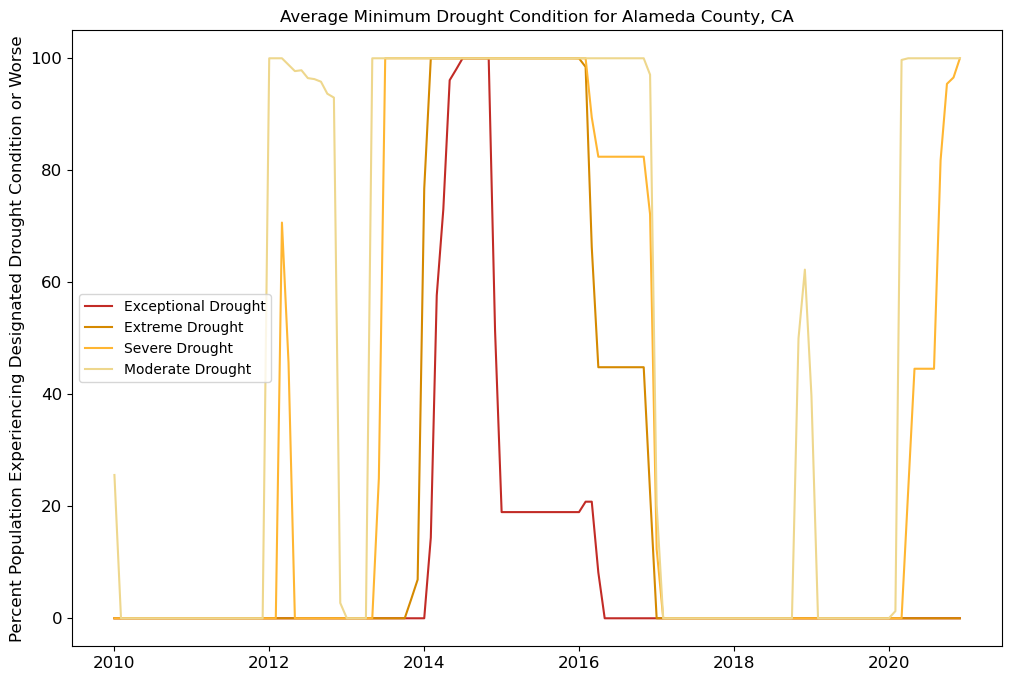

In [206]:
# FIPS Codes Filter
county_fips = '06001'
min_year = 2010
county = county_dict.get(county_fips)[1]
state = county_dict.get(county_fips)[0]

plot_temp_trends_county(county_fips, min_year, county, state)
plot_drought_trends_county(county_fips, min_year, county, state)

In [197]:
def plot_temp_trends_county(county_fips, min_year, county, state):    

    # Filtered Monthly Summary View
    county_month_view_df = mon[(mon['month'].dt.year >= min_year) & (mon['fips'] == county_fips)]
    county_month_view_df.set_index('month', inplace = True)

    # Annual Summary from Daily Data
    county_year_view_df = year[(year['year'].dt.year >= min_year) & (year['FIPS'] == county_fips)]
    county_year_view_df = county_year_view_df[['year','FIPS','Tmean_C']]
    # Convert to Farenheit
    county_year_view_df['Tmean_C'] *= (9/5)
    county_year_view_df['Tmean_C'] += 32
    county_year_view_df.rename(columns = {'Tmean_C' : 'Tmean_F'}, inplace = True)

    county_year_view_df.set_index('year', inplace = True)
    #cite: Time Series in Pandas Lesson
    
    
    # Plot
    plt.figure(figsize = (12,8))
    plt.plot(county_month_view_df['min_temp'], c = '#EED78D', label = 'Low Temp (F)')
    plt.plot(county_month_view_df['max_temp'], c = '#C22B26',  label = 'High Temp (F)')
    plt.plot(county_month_view_df['mean_temp'], c = '#FFB632',  label = 'Mean Temp (F)')
    plt.plot(county_year_view_df['Tmean_F'], c = 'k', label = 'Annual Mean Temp (F)',)

    # Horizontal line at the min_year baseline
    plt.axhline(county_year_view_df.loc['2010', 'Tmean_F'][0], c = '#808080', label = f'{min_year} Mean Annual Temp Baseline (F)') 

    plt.title(f"Temperature Trend for {county} County, {state}")
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.ylabel('Average Monthly Temperature (F)', fontsize = 12)
    plt.legend()
    plt.savefig(fname = f'EDA/temp_trend_{county}_{state}.png', dpi = 200, bbox_inches = 'tight')
    plt.show();

In [196]:
def plot_drought_trends_county(county_fips, min_year, county, state):
    
    # Filtered Monthly Summary View
    county_month_view_df = mon[(mon['month'].dt.year >= min_year) & (mon['fips'] == county_fips)]
    county_month_view_df.set_index('month', inplace = True)
    county_month_view_df['extreme_plus'] = county_month_view_df[['exceptional_drought','extreme_drought']].max(axis = 1)
    county_month_view_df['severe_plus'] = county_month_view_df[['exceptional_drought','extreme_drought','severe_drought']].max(axis = 1)
    county_month_view_df['moderate_plus'] = county_month_view_df[['exceptional_drought','extreme_drought','severe_drought', 'moderate_drought']].max(axis = 1)

    # Annual Summary from Daily Data
    county_year_view_df = year[(year['year'].dt.year >= min_year) & (year['FIPS'] == county_fips)]
    county_year_view_df = county_year_view_df[['year','FIPS','Tmean_C']]
    # Convert to Farenheit
    county_year_view_df['Tmean_C'] *= (9/5)
    county_year_view_df['Tmean_C'] += 32
    county_year_view_df.rename(columns = {'Tmean_C' : 'Tmean_F'}, inplace = True)

    county_year_view_df.set_index('year', inplace = True)
    #cite: Time Series in Pandas Lesson
    
    
    
    # Plot
    plt.figure(figsize = (12,8))
    plt.plot(county_month_view_df['exceptional_drought'], c = '#C22B26', label = 'Exceptional Drought')
    plt.plot(county_month_view_df['extreme_plus'], c = '#D58900',  label = 'Extreme Drought')
    plt.plot(county_month_view_df['severe_plus'], c = '#FFB632',  label = 'Severe Drought')
    plt.plot(county_month_view_df['moderate_plus'], c = '#EED78D',  label = 'Moderate Drought')
    
    # plt.plot(county_year_view_df['Tmean_F'], c = 'k', label = 'Annual Mean Temp (F)',)

    # Horizontal line at the min_year baseline
    # plt.axhline(county_year_view_df.loc['2010', 'Tmean_F'][0], c = '#808080', label = f'{min_year} Mean Annual Temp Baseline (F)') 

    plt.title(f"Average Minimum Drought Condition for {county} County, {state}")
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.ylabel('Percent Population Experiencing Designated Drought Condition or Worse', fontsize = 12)
    plt.legend()
    plt.savefig(fname = f'EDA/drought_trend_{county}_{state}.png', dpi = 200, bbox_inches = 'tight')
    plt.show();

### Time Series Choropleths

In [248]:
# cite : https://python-graph-gallery.com/choropleth-map-plotly-python/
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

#### Testing with Single County

/var/folders/w7/4sqt0lt90t72lgqr2zq3p6l80000gn/T/ipykernel_85379/6883969.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,month,fips,min_temp,max_temp,mean_temp,flag_pop_covered,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
373117,2010-01-01,06001,42.944,55.796,48.812,0.0,16.31,83.69,25.59,0.00,0.0,0.0
373118,2010-01-01,06003,22.298,36.140,28.652,0.0,20.31,79.69,10.66,0.00,0.0,0.0
373119,2010-01-01,06005,39.794,53.618,46.004,0.0,25.00,75.00,0.00,0.00,0.0,0.0
373120,2010-01-01,06007,41.360,54.266,47.102,0.0,14.22,85.78,62.69,5.96,0.0,0.0
373121,2010-01-01,06009,38.714,53.744,45.482,0.0,31.85,68.15,0.00,0.00,0.0,0.0


In [ ]:
county_fips = '06001'
min_year = 2010

# County Center latitude and longitude
county = county_dict.get(county_fips)[1]
state = county_dict.get(county_fips)[0]
county_lat = county_dict.get(county_fips)[3]
county_lon = county_dict.get(county_fips)[2]

# Filter down for State of Selected County
view_mon = mon[(mon['month'].dt.year == min_year) & (mon['fips'].str[:2] == county_fips[:2])]
view_mon['month'] = view_mon['month'].astype(str)

view_mon.head()
# Plot Choropleths
# cite: https://medium.com/p/2ff04921c60b

#Exceptional Drought
px.choropleth(data_frame = view_mon,
         lat=None,
         lon=None,
         locations='fips',
         geojson=counties,
         animation_frame='month',
         color='exceptional_drought',labels = 'Exceptional Drought',
         color_continuous_scale='Reds',
         range_color=[0,100],
         scope = 'usa', center = {'lat' : county_lat, 'lon' : county_lon},
         title = f'Percent Population Experiencing Exceptional Drought: {state}',
         height=600)

#Extreme Drought or worse
view_mon['extreme_plus'] = view_mon[['exceptional_drought','extreme_drought']].max(axis = 1)
px.choropleth(data_frame = view_mon,
         lat=None,
         lon=None,
         locations='fips',
         geojson=counties,
         animation_frame='month',
         color='extreme_plus',labels = 'Extreme Drought',
         color_continuous_scale='Oranges',
         range_color=[0,100],
         scope = 'usa', center = {'lat' : county_lat, 'lon' : county_lon},
         title = f'Percent Population Experiencing Extreme Drought: {state}',
         height=600)

#Severe Drought or worse
view_mon['severe_plus'] = view_mon[['exceptional_drought','extreme_drought','severe_drought']].max(axis = 1)
px.choropleth(data_frame = view_mon,
         lat=None,
         lon=None,
         locations='fips',
         geojson=counties,
         animation_frame='month',
         color='severe_plus',labels = 'Severe Drought',
         color_continuous_scale='Oranges',
         range_color=[0,100],
         scope = 'usa', center = {'lat' : county_lat, 'lon' : county_lon},
         title = f'Percent Population Experiencing Severe Drought: {state}',
         height=600)

#Moderate Drought or worse
view_mon['moderate_plus'] = view_mon[['exceptional_drought','extreme_drought','severe_drought', 'moderate_drought']].max(axis = 1)
px.choropleth(data_frame = view_mon,
         lat=None,
         lon=None,
         locations='fips',
         geojson=counties,
         animation_frame='month',
         color='moderate_plus',labels = 'Moderate Drought',
         color_continuous_scale='Oranges',
         range_color=[0,100],
         scope = 'usa', center = {'lat' : county_lat, 'lon' : county_lon},
         title = f'Percent Population Experiencing Moderate Drought: {state}',
         height=600)

/var/folders/w7/4sqt0lt90t72lgqr2zq3p6l80000gn/T/ipykernel_85379/3522930635.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

